<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подключение-к-БД" data-toc-modified-id="Подключение-к-БД-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подключение к БД</a></span></li><li><span><a href="#Знакомство-с-таблицами" data-toc-modified-id="Знакомство-с-таблицами-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство с таблицами</a></span></li><li><span><a href="#Задания" data-toc-modified-id="Задания-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задания</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

# Анализ базы данных сервиса для чтения книг по подписке.

**Заказчик:**

Коммерческий департамент компании

**Цель исследования:**

Анализ базы данных свежекупленного сервиса для формирования концепции нового продукта.

**Входные данные.**

База данных содержит информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг.

* <u>таблица books</u> cодержит данные о книгах:

`book_id` — идентификатор книги;  
`author_id` — идентификатор автора;  
`title` — название книги;  
`num_pages` — количество страниц;  
`publication_date` — дата публикации книги;  
`publisher_id` — идентификатор издателя.  

* <u>таблица authors</u> cодержит данные об авторах:

`author_id` — идентификатор автора;  
`author` — имя автора  

* <u>таблица publishers </u> cодержит данные об издательствах:

`publisher_id` — идентификатор издательства;  
`publisher` — название издательства;  

* <u>таблица ratings </u> cодержит данные о пользовательских оценках книг:

`rating_id` — идентификатор оценки;  
`book_id` — идентификатор книги;  
`username` — имя пользователя, оставившего оценку;  
`rating` — оценка книги.  

* <u> таблица reviews </u> cодержит данные о пользовательских обзорах на книги:

`review_id` — идентификатор обзора;  
`book_id` — идентификатор книги;  
`username` — имя пользователя, написавшего обзор;  
`text` — текст обзора.

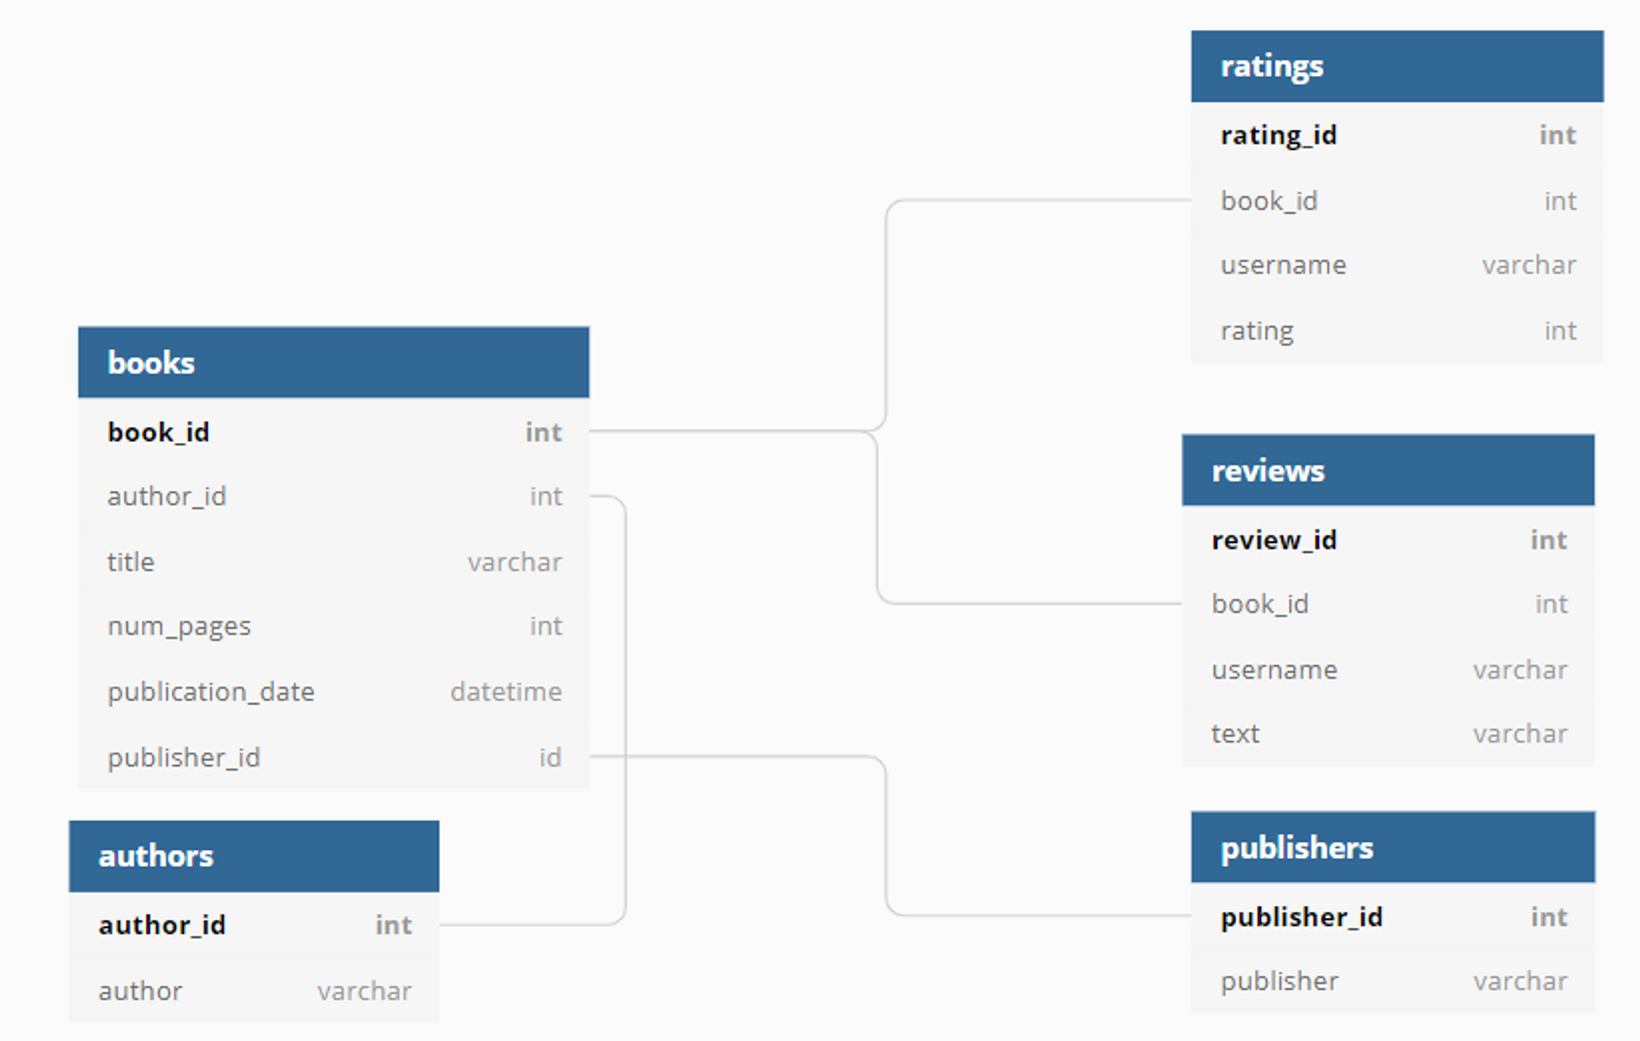

## Подключение к БД

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': '******', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
                                                         db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Знакомство с таблицами

**`books`**

In [2]:
query = '''

SELECT *
FROM books
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


**`authors`**

In [3]:
query = '''

SELECT *
FROM authors
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


**`publishers`**

In [4]:
query = '''

SELECT *
FROM publishers
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


**`ratings`**

In [5]:
query = '''

SELECT *
FROM ratings
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


**`reviews`**

In [6]:
query = '''

SELECT *
FROM reviews
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Задания

<u> Посчитайте, сколько книг вышло после 1 января 2000 года.</u> 

In [7]:
query = '''

SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'

'''

pd.io.sql.read_sql(query, con = engine)

,count
0,819


После 1 января 2000 года в каталог сервиса было добавлено 819 книг и брошюр.

<u>Для каждой книги посчитайте количество обзоров и среднюю оценку. </u>

In [8]:
query = '''

SELECT b.book_id,
       b.title,
       COUNT(DISTINCT review_id ) AS cnt_reviews,
       ROUND(AVG(r.rating),3) AS avg_rating

FROM books AS b

     LEFT JOIN ratings AS r ON r.book_id = b.book_id
     LEFT JOIN reviews AS rev ON rev.book_id = b.book_id

GROUP BY b.book_id, b.title
ORDER BY cnt_reviews DESC, avg_rating DESC

'''

pd.io.sql.read_sql(query, con = engine)

,book_id,title,cnt_reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.663
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.415
2,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.288
3,656,The Book Thief,6,4.264
4,734,The Glass Castle,6,4.207
...,...,...,...,...
995,191,Disney's Beauty and the Beast (A Little Golden...,0,4.000
996,387,Leonardo's Notebooks,0,4.000
997,221,Essential Tales and Poems,0,4.000
998,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.667


Всего в каталоге 1000 книг.  
Количество обзоров варьируется от 0 до 7.  
Мы видим, что количество обзоров на книгу не коррелирует со средним рейтингом, т.к. он отображает исключительно предпочтения пользователей.

<u> Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры. </u>

In [9]:
query = '''

SELECT p.publisher_id,
       publisher,
       COUNT(book_id) AS cnt_books

FROM publishers AS p
     JOIN books AS b ON b.publisher_id = p.publisher_id
     
WHERE num_pages > 50

GROUP BY p.publisher_id, p.publisher
ORDER BY cnt_books DESC
LIMIT 1

'''

pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher,cnt_books
0,212,Penguin Books,42


Наибольшее число книг (из анализа исключены брошюры до 50 страниц) выпустило издательство  **Penguin Books** - британское издательство, основанное в 1935 году в Лондоне сэром Алленом Лейном и его братьями Ричардом и Джоном. Главной заслугой издательства считают демократизацию книжного рынка, превратившую книгу из предмета роскоши в удовольствие, доступное массам.

<u> Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками. </u>

In [12]:
query = '''

WITH 

-- отбираем книги с количеством оценок более 50ти --

tab AS (
        SELECT book_id
        FROM ratings
        GROUP BY book_id
        HAVING COUNT(rating_id) >= 50)

SELECT a.author_id, 
       a.author, 
       ROUND(AVG(r.rating),3) AS avg_rating
FROM books AS b

INNER JOIN tab ON b.book_id = tab.book_id

INNER JOIN authors AS a ON b.author_id = a.author_id

INNER JOIN ratings AS r ON tab.book_id = r.book_id

GROUP BY a.author_id, a.author
ORDER BY AVG(r.rating) DESC

LIMIT 1

'''

pd.io.sql.read_sql(query, con = engine)

,author_id,author,avg_rating
0,236,J.K. Rowling/Mary GrandPré,4.287


Самая высокая средняя оценка книг в 4.29 балла из 5 - это тандем Джоан Роулинг (британской писательницы, автора популярной серии книг о Гарри Поттере) и американского иллюстратора Мари Грандпре (делала иллюстрации к обложкам и главам книг).

<u> Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.</u>

In [11]:
query = '''

SELECT COUNT(DISTINCT re.text)/ COUNT(DISTINCT re.username) AS avg_rev
FROM reviews AS re
JOIN ratings AS r ON r.username = re.username
WHERE re.username IN (SELECT username
                      FROM ratings
                      GROUP BY username
                      HAVING COUNT (rating) >= 50)
                      
'''

pd.io.sql.read_sql(query, con = engine)

,avg_rev
0,24


В среднем, пользователи поставившие более 50-ти оценок книгам и брошюрам, написали 24 обзора.

## Вывод:

Для анализа сервиса для чтения книг по подписке нам была предоставлена база данных с пятью таблицами.  
  
* в базе данных содержится информация о 1000 книгах  
* около 82% книг выпущены с 2000-го года (819 книг)
* наибольшее число книг (из анализа исключены брошюры до 50 страниц) выпустило британское издательство "Penguin Books" - 42 шт(~ 4%)  
* самые высокие оценки у автора Джоан Роулинг (средняя 4,29)  
* есть информация об активных пользователях, поставивших более 50-ти оценок книгам и написавшим в среднем 24 обзора.